> ### EEE2020-04: Data Structures & Algorithms

# Assignment \# IV: Searching & Sorting

**<div style="text-align: right"> Due date: June 3, 2019. </div>** 
**<div style="text-align: right"> Please upload your file @ yscec by 9 PM. </div>** 
<div style="text-align: right"> Youngmin Oh(오영민): <a href="mailto:youngmin.oh@yonsei.ac.kr">youngmin.oh@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Sanghoon Lee(이상훈): <a href="mailto:sanghslee@yonsei.ac.kr">sanghslee@yonsei.ac.kr</a> </div>

-------------------------------


### *Assignment Instructions:*
1. Write a program implementing a particular algorithm to solve a given problem.
2. You can use both Korean and English for your report.
3. **Analyze the algorithm, theoretically and empirically.** 
4. **Report your results.**  
5. <span style="color:red">**DO NOT**</span> alter **any** sanity check codes.  
    - You must do assignments and labs yourself. 
    - <span style="color:red">**Do not copy any part of your friends’ code.**</span>
    - Otherwise, you will get a F grade.

-----------------

<h2><span style="color:blue">[2016144018] [김동형]</span> </h2>

In [2]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-05-27 10:57:40.374063


-------------------------------

### PROBLEM I: Hashing (30 Points)

Implement $\texttt{ChainHashTable}$ using basic $\texttt{List}$ .

> As mentioned in our Lecture notes,  
> (vanilla)HashTable requires <U>reshash technique</U> to prevent **collision** between items that have identical hash value(s).
>
> $\texttt{ChainHashTable}$ settles collision by allowing multiple items be carried in a single slot, namely **'Chaining'**.  
> Details can be found in our Lecture Note 10 p.47(collision), p.58-61(chaining).  

Specifically, we will exploit basic $\texttt{List}$ to implement $\texttt{ChainHashTable}$ in this problem.  

Inputs and outputs of $\texttt{ChainHashTable}$ are specified as follows:  
* <code>init()</code>: constructs an empty HashTable.
* <code>put(key, data)</code>: puts data in HashTable according to its given key value (and returns nothing).
* <code>hash_function(key, slot_size)</code>: returns hash value of given key value.
* <code>get(key)</code>: returns <U>all</U> data stored in HashTable under given key value.
* <code>\_\_len\_\_()</code>: returns total number of data in HashTable.
* <code>\_\_contains\_\_(data)</code>: returns boolean value indicating whether 'data' is in HashTable.
* <code>remove(data)</code>: deletes the data in HashTable (only if it exists).


> Additional Instructions and Tips:
> * When a new item is assigned to a slot, the <U>**latest**</U> item should be at the <U>**front**</U> of the list under its <code>key</code> value.
> * We will overload <code>\_\_contains\_\_</code> method in order to use <code>in</code>.  
> * Note that there is no 'slots' in $\texttt{ChainHashTable}$. 
> * You may assume that <code>key</code> value is always <code>int</code> type.

> For further study, refer to [HERE](https://ratsgo.github.io/data%20structure&algorithm/2017/10/25/hash/) for additional explanation about **Collision** and **Chaining**.

### Answer:

In [39]:
class ChainHashTable:
    def __init__(self, size=10):
        self.size = size
        self.table = [None]*self.size
        
    def put(self, key, data):
        #############
        hash_value = self.hash_function(key,len(self.table))
        
        if self.table[hash_value]==None:
            self.table[hash_value]=list()
            self.table[hash_value].append(data)
        else:
            self.table[hash_value].append(data)
            
        #############    
    def hash_function(self, key,size):
        #############
        return key%size
        #############

    def get(self, key):
        #############
        start_slot = self.hash_function(key,self.size)
        return self.table[start_slot]
        #############

    def __len__(self):
        #############
        s=0
        for i in range (self.size):
            if self.table[i]!=None:
                for x in range (len(self.table[i])):
                    s+=1
        return s
        #############
    
    def __contains__ (self, data):
        #############
        found=True
        for i in range (self.size):
            if self.table[i] == None:
                continue
            if data in self.table[i]:
                return found
        return not found
        #############
    
    def remove(self, data):
        #############
        for i in range (self.size):
            if self.table[i] == None:
                continue
            if data in self.table[i]:
                self.table[i].remove(data)
                break
        else:
            print('그값이 존재하지 않습니다')
        #############
               
    def __getitem__(self, key):
        return self.get(key)
                   
    def __setitem__(self,key,data ):
        self.put(key, data)
        

In [40]:
### sanity check code ###
h = ChainHashTable()

h[57] = 'nike'; h[1] = 'horse'; h[42] = 'lion'; h[121] = 'zebra'; h[51] = 'giraffe'; h[2] = 'cat'; h[152] = 'jaguar'; h[44] = 'bentley'; h[94] = 'jaguar'
h[3] = 'dog'; h[5213] = 'retriever'; h[43] = 'maltese'; h[7] = 'sports'; h[4] = 'car'; h[64] = 'porsche'; h[97] = 'adidas'

print('-----------sanity check-------------')
print('')

print(h.table)
print('check hash function(9):',h.hash_function(19, 10))
print('length of h(16):', len(h))
print('True:', 'bentley' in h)
print('False:', 'puma' in h)
h.remove('bentley')
h.remove('maltese')
print(h.table)
print('length of h(14):', len(h))
print('True:', 'porsche' in h)
print('True:', 'jaguar' in h)
print('False:', 'puma' in h)

-----------sanity check-------------

[None, ['horse', 'zebra', 'giraffe'], ['lion', 'cat', 'jaguar'], ['dog', 'retriever', 'maltese'], ['bentley', 'jaguar', 'car', 'porsche'], None, None, ['nike', 'sports', 'adidas'], None, None]
check hash function(9): 9
length of h(16): 16
True: True
False: False
[None, ['horse', 'zebra', 'giraffe'], ['lion', 'cat', 'jaguar'], ['dog', 'retriever'], ['jaguar', 'car', 'porsche'], None, None, ['nike', 'sports', 'adidas'], None, None]
length of h(14): 14
True: True
True: True
False: False


### Description:

chain hash table을 구성하는데 원래 내가 알던 chain hash와는 다르게 작용해 헷갈려 많은 시간을 허비했다. 그러나 같은 키값을 가지는 item들을 다 같이 표현해내는 것을 보고 쉽게 문제를 해결할 수 있었다.

-----------------

### PROBLEM II: Sorting I (30 Points)

Suppose you are now a data scientist and given $\underline{N}$ points in a 2-D Cartesian Coordinate System from your experiment. 
<br>
<br>
To analyze this data, You want to SORT them in $\texttt{ascending}$ order of 'X' coordinates.
If there are the same 'X' coordinates points, You dicide to sort them in $\texttt{desending}$ order of 'Y' coordinates.
> For example, given (0,1) , (1, 2) , (-3, 5) , (0, 11)
$\rightarrow$ (-3, 5) , (0, 11) , (0, 1) , (1, 2)


<br>
<br>

To this end,
- Implement $\texttt{(1) Bubble Sort}$ , $\texttt{(2) Insertion Sort}$ and $\texttt{(3) Merge Sort}$
- Compare their $\texttt{Complexity}$ by plotting the graphs $\underline{Elapsed\;time}$ versus $\underline{N}$ 
- Discuss your results

<br>
$\mathbf{NOTICE}$ : Do Not Use any pre-built Sorting Library. ( e.g. sorted() or numpy.sort() ) 

### Answer:

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

class Sorting():
    def __init__(self):
        pass
    def __gen_coords__(self, N=10):
        return np.random.randint(-N,N,(N,2))
    def bubble_sort(self, coords):
        for pass_num in range (len(coords)-1,0,-1):
            for i in range(pass_num):
                if coords[i][0]> coords[i+1][0]:
                    temp = coords[i,:].copy()
                    A=coords[i+1,:].copy()
                    coords[i,:] = A
                    coords[i+1,:]=temp
                elif coords[i][0]==coords[i+1][0]:
                    if coords[i][1]<coords[i+1][1]:
                        temp = coords[i,:].copy()
                        A=coords[i+1,:].copy()
                        coords[i,:] = A
                        coords[i+1,:]=temp
        return coords
    def insert_sort(self, coords):
        for index in range(1, len(coords)):
            current_value=coords[index].copy()
            current_value1 = current_value[0]
            current_value2 = current_value[1]
            position = index
        
            while position > 0 and coords[position - 1][0] > current_value1:
                val=coords[position].copy()
                cha=coords[position-1].copy()
                coords[position]= cha
                coords[position-1]=val
                position = position - 1
            while position >0 and coords[position -1][1]<current_value2 and coords[position-1][0]==current_value1:
                val=coords[position].copy()
                cha=coords[position-1].copy()
                coords[position]=cha
                coords[position-1]=val
                position=position-1
        coords[position] = current_value
        return coords
        
        
        ### CODE HERE ###
    def merge_sort(self, coords):
        if len(coords) > 1:
            mid = len(coords) // 2
            left_half = coords[:mid].copy()
            right_half = coords[mid:].copy()

            self.merge_sort(left_half)
            self.merge_sort(right_half)

            i=0 
            j=0 
            k=0

            while (i < len(left_half) and j < len(right_half)):
                if left_half[i][0] < right_half[j][0]:
                    X=left_half[i].copy()
                    coords[k] =X
                    i=i+1 
                elif left_half[i][0]==right_half[j][0] and left_half[i][1]>right_half[j][1]:
                    X=left_half[i].copy()
                    coords[k]=X
                    i=i+1
                else:
                    Y=right_half[j].copy()
                    coords[k]=Y
                    j=j+1
                k=k+1

            while i < len(left_half): 
                X=left_half[i].copy()
                coords[k] = X
                i=i+1
                k=k+1

            while j < len(right_half): 
                Y=right_half[j].copy()
                coords[k] = Y 
                j=j+1
                k=k+1
        return coords

        ### CODE HERE ###

In [114]:
# Sanity Check
mySort = Sorting()
coords = np.array([[ 4, -1], [ 4,  3], [-2, -2], [ 4, -2], [ 2, -3]])
print('--- Coordinates ---')
print(coords)
print()
print()
print('---Bubble Sorted---')
o1=mySort.bubble_sort(coords.copy())
print(o1)
print('-------------------')
print()
print('---Insert Sorted---')
o2=mySort.insert_sort(coords.copy())
print(o2)
print('-------------------')
print()
print('---Merge  Sorted---')
o3=mySort.merge_sort(coords.copy())
print(o3)
print('-------------------')
print()
print()

if (o1==o2).sum() == (o2==o3).sum() == (o1==o3).sum():
    print('Correct !!!')
else:
    print('Wrong !!!')

--- Coordinates ---
[[ 4 -1]
 [ 4  3]
 [-2 -2]
 [ 4 -2]
 [ 2 -3]]


---Bubble Sorted---
[[-2 -2]
 [ 2 -3]
 [ 4  3]
 [ 4 -1]
 [ 4 -2]]
-------------------

---Insert Sorted---
[[-2 -2]
 [ 2 -3]
 [ 4  3]
 [ 4 -1]
 [ 4 -2]]
-------------------

---Merge  Sorted---
[[-2 -2]
 [ 2 -3]
 [ 4  3]
 [ 4 -1]
 [ 4 -2]]
-------------------


Correct !!!


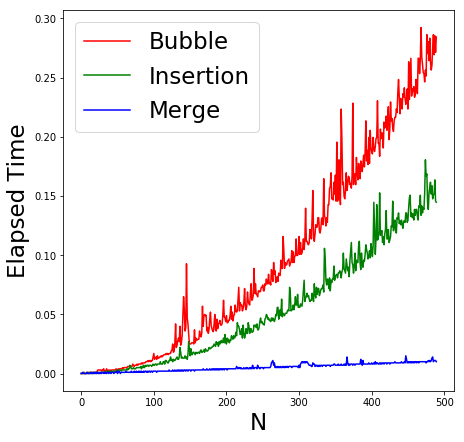

In [116]:
import time
def compute_elapsed_time(func):
    time_hist=[]
    for N in range(10, 500):
        ### CODE HERE ###
        start = time.time()
        a=np.random.random((N,2))
        func(a)
        end=time.time()
        time_hist.append(end-start)
        ### END ###

    return time_hist

plt.figure(figsize=(7,7))
plt.xlabel('N', fontsize=23)
plt.ylabel('Elapsed Time', fontsize=23)

# It will take at most 3 minutes
plt.plot(compute_elapsed_time(mySort.bubble_sort), c='r',label='Bubble')
plt.plot(compute_elapsed_time(mySort.insert_sort), c='g',label='Insertion')
plt.plot(compute_elapsed_time(mySort.merge_sort), c='b',label='Merge')
plt.legend(fontsize=23)

### Description:

bubble과 insertion merge의 시간차가 극명함을 볼 수 있었다. 특히 이문제는 dnode를 사용해 어떻게하면 위치를 바꿔줄지 처음에 헤매었는데 data값만 바꿔주면 된다는 사실을 알고 쉽게 해결이 가능했다. 

---------------

### PROBLEM III: Sorting II (40 Points)

Given $\texttt{Doubly Linked List(DLL)}$ (you already implemented in HW3) containing $\underline{N}$ Nodes, 
<br> You want to SORT Nodes which contain strings in $\texttt{dictionary}$ order. 
<br> Moreover, Uppercase letters always precede Lowercase letters. 
<br>
<br>
> For example, given $\texttt{DLL}$ containing ['ahi'] - ['A'] - ['bc'] - ['BD']
<br> $\rightarrow$ ['A'] - ['BD'] - ['ahi'] - ['bc']


<br>
<br>

To this end, 
- Implement $\texttt{(1) Selection Sort}$ , $\texttt{(2) Shell Sort}$ and $\texttt{(3) Quick Sort}$
- Compare their $\texttt{Complexity}$ by plotting the graphs $\underline{Elapsed\;time}$ versus $\underline{N}$ 
- Discuss your results

<br>
$\mathbf{NOTICE}$ : Do Not Use any pre-built Sorting Library. ( e.g. sorted() or numpy.sort() ) 

**Additional Instructions and Tips**
- Use the given $\texttt{dNode}$ class
- Use the built-in functions of the given $\texttt{DLL}$ class <br> ( e.g. is_empty, size, push_back and print_from_front )
- To begin with, You Should implement $\texttt{search_from_front}$ and $\texttt{compare_string}$

> $\texttt{search_from_front}$ takes 'loc' a certain location $\subset$ [1, self.size()] <br> and outputs dNode at 'loc' and the corresponding data

> $\texttt{compare_string}$ takes two strings and compare them.
<br> It outputs **True** if str2 precedes str1 or str1 is equal to str2, **False** if str1 precedes str2.

- Implement $\texttt{compute_elapsed_time}$ by using $\texttt{reset}$ and $\texttt{gen_str}$

<br>
By using $\texttt{search_from_front}$ and $\texttt{compare_string}$,

- Implement $\texttt{select_sort}$
- Implement $\texttt{shell_sort}$ with $\texttt{gap_insertion_sort}$
- Implement $\texttt{_quick_sort_helper}$ with $\texttt{_partition}$

### Answer:

In [26]:
import numpy as np
import string, random
import matplotlib.pyplot as plt
from time import time

class dNode:
    def __init__(self, init_data):
        self.data = init_data
        self.prev = None
        self.next = None
        
class DLL():
    def __init__(self):
        self.head = dNode(None)
        self.tail = dNode(None)
    def is_empty(self):
        return self.head.next == None
    def size(self):
        if self.is_empty(): return 0
        else:
            current = self.head
            cnt = 0
            while current.next != self.tail:
                cnt += 1
                current = current.next
            return cnt
    def push_back(self, item):
        tmp=dNode(item)
        if self.is_empty():
            self.head.next = tmp
            self.tail.prev = tmp
            tmp.next = self.tail
            tmp.prev = self.head
        else:
            current=self.tail.prev
            self.tail.prev = tmp
            tmp.next = self.tail
            tmp.prev = current
            current.next = tmp
    def print_from_front(self):
        if self.is_empty():
            print('Print Error : The List is empty')
        else:
            current = self.head
            print('Stored data(Foward) : ',end = '')
            while True:
                current = current.next
                if current == self.tail: break
                print(current.data, end=' ')
            print('')
    def search_from_front(self,loc):
        if self.is_empty() or loc > self.size() or loc<=0:
            print('Search Error')
            return None
        else:
            current = self.head
            previous = None
            location =0
            found=False

            while location!=loc:
                previous=current
                current=current.next
                location+=1
        return current
             ### CODE HERE ###
        
    def compare_string(self, str1, str2):
        if str2 <= str1:
            return True
        else:
            return False
        ### CODE HERE ###
    
    def select_sort(self):  
        m=self.size()
        if self.head == None:
            return
        else:  
            for i in range (self.size(),1,-1):  
                pos_of_max=1
                current=self.search_from_front(pos_of_max)
                for location in range (2,i+1):  
                    comp=self.search_from_front(location)
                    if self.compare_string(comp.data,current.data):
                        pos_of_max=location
                big=self.search_from_front(pos_of_max)
                origin=self.search_from_front(i)
                temp=big.data
                ori=origin.data
                big.data=ori
                origin.data=temp
                


    def shell_sort(self):
        sublist_count=self.size()//2
        while sublist_count>0:
            for start_position in range(1,(sublist_count+1)):
                self.gap_insertion_sort(start_position,sublist_count)
            sublist_count=sublist_count//2
        ### CODE HERE ###
    def gap_insertion_sort(self,start,gap):
        ### CODE HERE ###
        for i in range(start+gap, self.size()+1, gap):
            current_value = self.search_from_front(i).data
            position=i
            while position>gap and self.compare_string(self.search_from_front(position-gap).data,current_value):
                temp=self.search_from_front(position-gap).data
                self.search_from_front(position).data=temp
                position=position-gap
            self.search_from_front(position).data=current_value
            
            
    def quick_sort(self):
        self._quick_sort_helper(1, self.size())
    def _quick_sort_helper(self, first, last):
        ### CODE HERE ###
        if first < last:
            split_point = self._partition(first,last)
            self._quick_sort_helper(first, split_point-1)
            self._quick_sort_helper(split_point+1,last)
    def _partition(self, first, last):
        ### CODE HERE ###
        pivot_value = self.search_from_front(first).data 
        left_mark = first + 1 
        right_mark = last
        done = False

        while not done:
            while left_mark <= right_mark and not self.compare_string(self.search_from_front(left_mark).data,pivot_value):
                left_mark = left_mark + 1

            while self.compare_string(self.search_from_front(right_mark).data,pivot_value) and right_mark >= left_mark:
                right_mark = right_mark - 1

            if right_mark < left_mark: 
                done = True
            else:
                temp =self.search_from_front(left_mark).data
                self.search_from_front(left_mark).data = self.search_from_front(right_mark).data
                self.search_from_front(right_mark).data = temp

        temp = self.search_from_front(first).data
        self.search_from_front(first).data =self.search_from_front(right_mark).data 
        self.search_from_front(right_mark).data  = temp

        return right_mark
    
    def __reset__(self):
        self.head=dNode(None)
        self.tail=dNode(None)
    def __gen_str__(self, N):
        self.__reset__()
        letters = string.ascii_letters
        for i in range(N):
            self.push_back(''.join(random.choice(letters) for i in range(5)))
    def compute_elapsed_time(self, sort_name):
        time_hist=[]

        for N in range(10, 150):
            start = time()
            self.__gen_str__(N)
            if sort_name =='quick':
                self.quick_sort()
            elif sort_name =='select':
                self.select_sort()
            elif sort_name == 'shell':
                self.shell_sort()
            end=time()
            time_hist.append(end-start)
        ### END ###



            ### CODE HERE ###
        return time_hist

Stored data(Foward) : redvelvet TWICE twice iu 
Stored data(Foward) : TWICE iu redvelvet twice 

Stored data(Foward) : redvelvet TWICE twice iu 
Stored data(Foward) : TWICE iu redvelvet twice 

Stored data(Foward) : redvelvet TWICE twice iu 
Stored data(Foward) : TWICE iu redvelvet twice 



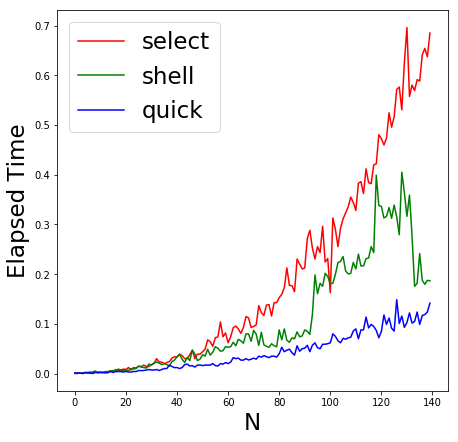

In [27]:
# Sanity Check
myDLL = DLL()
myDLL.push_back('redvelvet')
myDLL.push_back('TWICE')
myDLL.push_back('twice')
myDLL.push_back('iu')
myDLL.print_from_front()
myDLL.select_sort()
myDLL.print_from_front()
print()
myDLL = DLL()
myDLL.push_back('redvelvet')
myDLL.push_back('TWICE')
myDLL.push_back('twice')
myDLL.push_back('iu')
myDLL.print_from_front()
myDLL.shell_sort()
myDLL.print_from_front()
print()
myDLL = DLL()
myDLL.push_back('redvelvet')
myDLL.push_back('TWICE')
myDLL.push_back('twice')
myDLL.push_back('iu')
myDLL.print_from_front()
myDLL.quick_sort()
myDLL.print_from_front()
print()


plt.figure(figsize=(7,7))
plt.xlabel('N', fontsize=23)
plt.ylabel('Elapsed Time', fontsize=23)

# It will take at most 3 minutes 
plt.plot(myDLL.compute_elapsed_time('select'), c='r',label='select')
plt.plot(myDLL.compute_elapsed_time('shell'), c='g',label='shell')
plt.plot(myDLL.compute_elapsed_time('quick'), c='b',label='quick')
plt.legend(fontsize=23)

### Description:

문제에서 가장 어려웠던 것은 첫번째 위치가 0이 아니라 1이었다는 사실이었다. 그래서 리스트로 sort를 할때와 차이가 있어 계속 nonetype오류가 떴으나 이를 인지하고 해결해냈다. 그래프를 통해서 quicksort가 가장 빠른 sort방법이라는 것을 알 수 있었다.

---------------